In [29]:
import numpy as np
import matplotlib.pyplot as plt
from FP import *

import matplotlib

In [ ]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))


# Visualize data

In [30]:
# Generate a rotation matrix based on the two given angles
def rotMat(angle, type_ang):
    if type_ang=='xy':
        coords = [0,1]
    elif type_ang== 'xz':
        coords = [0,2]
    elif type_ang =='yz':
        coords= [1,2]
    else:
        raise Exception()
    
    A = np.eye(3)
    
    A[coords[0],coords ]= np.cos(angle), np.sin(angle)
    A[coords[1],coords ]= -np.sin(angle), np.cos(angle)
    return A

# The axis radii defining the ellipsoid
def mult_direc():
    return  np.array([8,6,4])

In [31]:
# Amount of samples
n=5000

# Sample uniformly unit spheres domains
data_x1 =  np.random.randn(n,3)
data_x1 = data_x1/np.linalg.norm(data_x1,axis=1,keepdims=True)
data_x2 =  np.random.randn(n,3)
data_x2 = data_x2/np.linalg.norm(data_x2,axis=1,keepdims=True)


theta = np.concatenate([ np.arctan2(data_x1[:,1],data_x1[:,0])[:,None], \
                         np.arctan2(data_x2[:,1],data_x2[:,0])[:,None]],axis=1)
phis  = np.concatenate([ np.arccos( data_x1[:,2])[:,None], \
                         np.arccos( data_x2[:,2])[:,None]],axis=1)
data_x1= data_x1 @np.diag(mult_direc())
data_x2= data_x2 @np.diag(mult_direc())
data2_x2= np.array([np.cos(theta[:,0])*np.sin(phis[:,1]),\
                    np.sin(theta[:,0])*np.sin(phis[:,1]),\
                    np.cos(phis[:,1])]).T @np.diag(mult_direc())


R1 = rotMat(np.random.randn()*2*np.pi, 'xz')@rotMat(np.random.randn()*2*np.pi, 'xy')@rotMat(np.random.randn()*2*np.pi, 'yz')
R2 =  rotMat(np.random.randn()*2*np.pi, 'yz')@rotMat(np.random.randn()*2*np.pi, 'xz')@rotMat(np.random.randn()*2*np.pi, 'xy')


data1= np.concatenate([data_x1@R1,data_x2@R2],axis=1)
data2= np.concatenate([data_x1@R1,data2_x2@R2],axis=1)

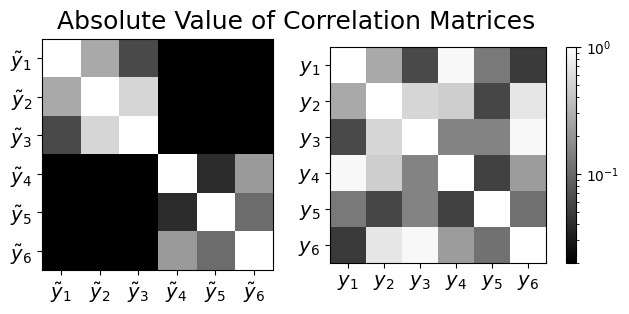

In [54]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

f,ax= plt.subplots(1,2,figsize=(7,3))

ax[0].imshow(np.abs(np.corrcoef(data1.T)),cmap='gray', norm="log",vmin=2e-2, vmax= 1)
im=ax[1].imshow(np.abs(np.corrcoef(data2.T)),cmap='gray',norm="log", vmin= 2e-2, vmax=  1)

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.2)
f.colorbar(im, cax=cax)


plt.suptitle('Absolute Value of Correlation Matrices',fontsize=18)

ax[0].set_xticks(np.arange(6),[r'$z_'+str(i+1)+'$' for i in range(6)],fontsize=14)
ax[0].set_yticks(np.arange(6),[r'$z_'+str(i+1)+'$' for i in range(6)],fontsize=14)


ax[0].set_xticks(np.arange(6),[r'$\tilde{y}_'+str(i+1)+'$' for i in range(6)],fontsize=14)
ax[0].set_yticks(np.arange(6),[r'$\tilde{y}_'+str(i+1)+'$' for i in range(6)],fontsize=14)

ax[1].set_xticks(np.arange(6),[r'$y_'+str(i+1)+'$' for i in range(6)],fontsize=14)
ax[1].set_yticks(np.arange(6),[r'$y_'+str(i+1)+'$' for i in range(6)],fontsize=14)


(80, 80, 3)


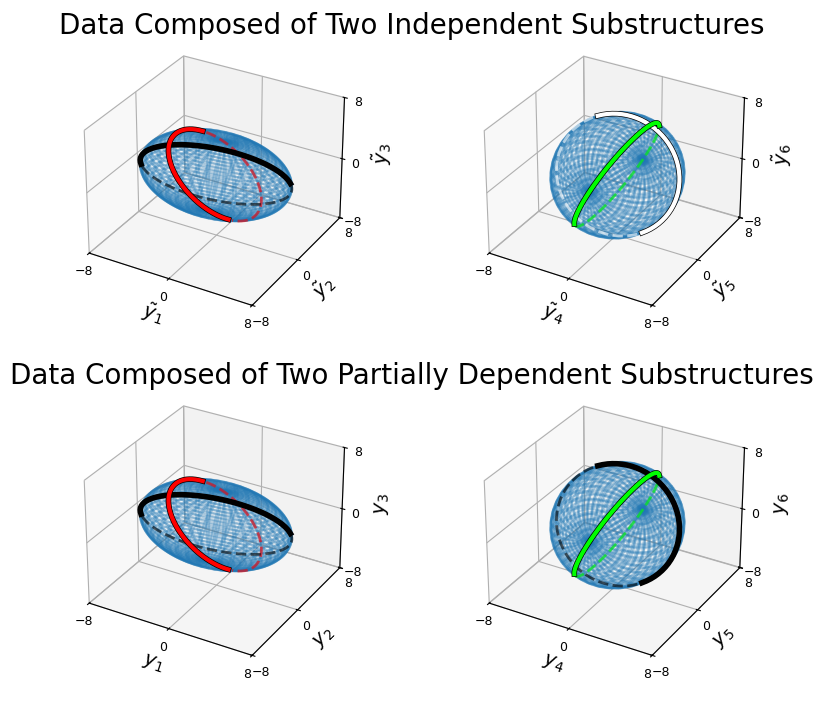

In [36]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def my_plot(x,ax,c,ind,line=None):
    if line is None:
        line='-'

    direction = ax.get_proj()[-1,:-1]
    direction = direction*np.sign(direction[0])
    inds = np.where( x@direction> np.sum(0*direction))[0]
    
    
    if np.max(inds)-np.min(inds)!=len(inds)-1:
        for i in range(1,x.shape[0]):
            if inds[i]!=i:
                break
        inds = np.concatenate([inds[i:], inds[:i]])
    
    ax.plot(x[inds,0],x[inds,1],x[inds,2],line,c='black',zorder=10+ind,linewidth=4)
    ax.plot(x[inds,0],x[inds,1],x[inds,2],line,c=c,zorder=10+ind,linewidth=3)
    
    inds = np.where( x@direction<= np.sum(0*direction))[0]
    if np.max(inds)-np.min(inds)!=len(inds)-1:
        for i in range(1,x.shape[0]):
            if inds[i]!=i:
                break
        inds = np.concatenate([inds[i:], inds[:i]])
    ax.plot(x[inds,0],x[inds,1],x[inds,2],'--',c=c,zorder=10-ind,linewidth=2,alpha=.6)


fig = plt.figure(figsize=(8,7),layout='constrained')

ax11 = fig.add_subplot(221, projection='3d')
ax12 = fig.add_subplot(222, projection='3d')

ax21 = fig.add_subplot(223, projection='3d')
ax22 = fig.add_subplot(224, projection='3d')


# Generate the data
u = np.linspace(0, 2 * np.pi, 80)
v = np.linspace(0, np.pi, 80,endpoint=True)
x =  mult_direc()[0]*np.outer(np.cos(u), np.sin(2*v))#*0.95
y =  mult_direc()[1]*np.outer(np.sin(u), np.sin(2*v))#*0.95
z =  mult_direc()[2]*np.outer(np.ones(np.size(u)), np.cos(2*v))#*0.95

whole_grid= np.concatenate([x.reshape((-1,1)),y.reshape((-1,1)),z.reshape((-1,1))],axis=1)
whole_grid1 = (whole_grid@R1).reshape((u.size,v.size,3)) 
whole_grid2 = (whole_grid@R2).reshape((u.size,v.size,3)) 
print(whole_grid1.shape)

x1,y1,z1= whole_grid1[:,:,0],whole_grid1[:,:,1],whole_grid1[:,:,2]
x2,y2,z2= whole_grid2[:,:,0],whole_grid2[:,:,1],whole_grid2[:,:,2]

# Plot the surface
ax11.plot_wireframe (x1, y1, z1, alpha=0.3,zorder=0)
ax12.plot_wireframe (x2, y2, z2, alpha=0.3,zorder=0)
ax21.plot_wireframe (x1, y1, z1, alpha=0.3,zorder=0)
ax22.plot_wireframe (x2, y2, z2, alpha=0.3,zorder=0)


# Generate circles along the principal axes of the ellipsoid
circle_xy1= np.array([np.cos(u), np.sin(u),u*0]).T@np.diag(mult_direc())@R1
circle_xz1= np.array([np.sin(v*2), v*0,np.cos(v*2)]).T@np.diag(mult_direc())@R1
circle_yz1= np.array([v*0., np.sin(v*2),np.cos(v*2)]).T@np.diag(mult_direc())@R1

circle_xy2= np.array([np.cos(u), np.sin(u),u*0]).T@np.diag(mult_direc())@R2
circle_xz2= np.array([np.sin(v*2), v*0,np.cos(v*2)]).T@np.diag(mult_direc())@R2
circle_yz2= np.array([v*0., np.sin(v*2),np.cos(v*2)]).T@np.diag(mult_direc())@R2


my_plot(circle_xy1,ax11,'black',0)
my_plot(circle_xz1,ax11,'red',1)

my_plot(circle_xy2,ax12,'white',0)
my_plot(circle_xz2,ax12,'lime',1)

my_plot(circle_xy1,ax21,'black',0)
my_plot(circle_xz1,ax21,'red',1)

my_plot(circle_xy2,ax22,'black',0)
my_plot(circle_xz2,ax22,'lime',1)


ax11.set_xlabel(r'$\tilde{y}_1$',fontsize=14,labelpad=-0.2)
ax11.set_ylabel(r'$\tilde{y}_2$',fontsize=14,labelpad=-0.2)
ax11.set_zlabel(r'$\tilde{y}_3$',fontsize=14,labelpad=-0.2)

ax12.set_xlabel(r'$\tilde{y}_4$',fontsize=14,labelpad=-0.2)
ax12.set_ylabel(r'$\tilde{y}_5$',fontsize=14,labelpad=-0.2)
ax12.set_zlabel(r'$\tilde{y}_6$',fontsize=14,labelpad=-0.2)

ax21.set_xlabel(r'$y_1$',fontsize=14,labelpad=-0.2)
ax21.set_ylabel(r'$y_2$',fontsize=14,labelpad=-0.2)
ax21.set_zlabel(r'$y_3$',fontsize=14,labelpad=-0.2)

ax22.set_xlabel(r'$y_4$',fontsize=14,labelpad=-0.2)
ax22.set_ylabel(r'$y_5$',fontsize=14,labelpad=-0.2)
ax22.set_zlabel(r'$y_6$',fontsize=14,labelpad=-0.2)

for ax in [ax11,ax12,ax21,ax22]:
    ax.tick_params(axis='both', which='major', labelsize=9,pad=-1)
    ax.set_box_aspect(None, zoom=0.85)
    ax.set_xticks([-np.max(mult_direc()), 0., np.max(mult_direc())])
    ax.set_yticks([-np.max(mult_direc()), 0., np.max(mult_direc())])
    ax.set_zticks([-np.max(mult_direc()), 0., np.max(mult_direc())])


#fig.suptitle(r' Data with two unrelated structures',fontsize=20)
fig.text(0.5, 0.96, 'Data Composed of Two Independent Substructures', ha='center', fontsize=20)
fig.text(0.5, 0.46, 'Data Composed of Two Partially Dependent Substructures', ha='center', fontsize=20)

plt.show()


# 100 simulations

In [5]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralCoclustering,SpectralBiclustering,FeatureAgglomeration, spectral_clustering
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.cluster import  SpectralClustering


In [14]:
# The function generates n points sampled from two data structures. In data1, each point has six coordinates,
# where the first and last triplets are defined over independent ellipsoids. In data2, the same domain is used,
# but both ellipsoids are constrained to share the same polar angle.
#
# Input:
#   n : int
#       Number of samples to generate.
#
#   seed : int, optional
#       Random seed for reproducibility.
#
# Output:
#   data1 : ndarray of shape (n, 6)
#       Samples where both triplets are defined over independent ellipsoids.
#
#   data2 : ndarray of shape (n, 6)
#       Samples where both triplets are constrained to share the polar angle.
def generateData(n, seed=None):
    if seed is not None:
        np.random.seed(seed)
    data_x1 =  np.random.randn(n,3)
    data_x1 = data_x1/np.linalg.norm(data_x1,axis=1,keepdims=True)
    data_x2 =  np.random.randn(n,3)
    data_x2 = data_x2/np.linalg.norm(data_x2,axis=1,keepdims=True)


    theta = np.concatenate([ np.arctan2(data_x1[:,1],data_x1[:,0])[:,None], \
                             np.arctan2(data_x2[:,1],data_x2[:,0])[:,None]],axis=1)
    phis  = np.concatenate([ np.arccos( data_x1[:,2])[:,None], \
                             np.arccos( data_x2[:,2])[:,None]],axis=1)
    data_x1= data_x1 @np.diag(mult_direc())
    data_x2= data_x2 @np.diag(mult_direc())
    data2_x2= np.array([np.cos(theta[:,0])*np.sin(phis[:,1]),\
                        np.sin(theta[:,0])*np.sin(phis[:,1]),\
                        np.cos(phis[:,1])]).T @np.diag(mult_direc())


    R1 = rotMat(np.random.randn()*2*np.pi, 'xz')@rotMat(np.random.randn()*2*np.pi, 'xy')@rotMat(np.random.randn()*2*np.pi, 'yz')
    R2 =  rotMat(np.random.randn()*2*np.pi, 'yz')@rotMat(np.random.randn()*2*np.pi, 'xz')@rotMat(np.random.randn()*2*np.pi, 'xy')


    data1= np.concatenate([data_x1@R1,data_x2@R2],axis=1)
    data2= np.concatenate([data_x1@R1,data2_x2@R2],axis=1)


    return data1,data2

# The function evaluates the accuracy of a feature clustering by comparing it to the ground truth.
# It returns the number of features that would need to be reassigned to the other cluster to match
# the correct grouping, where the first three features and the last three features form the two true clusters.
#
# Input:
#   grouping : array-like of length 6
#       Cluster assignments (0 or 1) for each of the six features.
#
# Output:
#   error : int
#       Number of misclustered features that must be moved to match the ground truth.
def get_error(grouping):
    right_mask = np.zeros((6))
    right_mask[3:]=1
    
    return np.min([np.sum( np.abs(grouping-right_mask)), np.sum( np.abs(grouping- (1-right_mask)))])

In [ ]:
n=1000
trails= 100
errors1 = np.zeros((trails,5))
errors2 = np.zeros((trails,5))
FP_sims= np.zeros((trails,2))


for i in range(trails):
    print(i)
    newData1, newData2= generateData(n,seed=i)
    
    perm =np.random.permutation(6)
    unperm = np.argsort(perm)
    newData1_perm = newData1[:,perm]
    newData2_perm = newData2[:,perm]
    
    
    errors1[i,0]=get_error(SpectralCoclustering(n_clusters=2,random_state=100*i).fit(newData1_perm).column_labels_[unperm])
    errors2[i,0]=get_error(SpectralCoclustering(n_clusters=2,random_state=100*i).fit(newData2_perm).column_labels_[unperm])

    errors1[i,1]=get_error(SpectralBiclustering(n_clusters=2,random_state=100*i).fit(newData1_perm).column_labels_[unperm])
    errors2[i,1]=get_error(SpectralBiclustering(n_clusters=2,random_state=100*i).fit(newData2_perm).column_labels_[unperm])


    
    errors1[i,2]=get_error(KMeans(n_clusters=2, random_state=100*i).fit(newData1_perm.T).labels_[unperm])
    errors2[i,2]=get_error(KMeans(n_clusters=2, random_state=100*i).fit(newData2_perm.T).labels_[unperm])

    errors1[i,3]=get_error(SpectralClustering(n_clusters=2, affinity='nearest_neighbors',n_components=2, n_neighbors=2+1,random_state=100*i).fit_predict( newData1_perm.T)[unperm])
    errors2[i,3]=get_error(SpectralClustering( n_clusters=2, affinity='nearest_neighbors',n_components=2, n_neighbors=2+1,random_state=100*i).fit_predict( newData2_perm.T)[unperm])
    
    fp = FP(  perplexity=10, K=2)
    fp.fit(newData1_perm, verbose_updates=False, iters=100, simulations=5,random_seed=100*i)
    errors1[i,5]=get_error(fp.get_optimal_parameters()['omega'][0][unperm])
    FP_sims[i,0]=fp.get_optimization_summary()['simulation_id']
    
    fp = FP(  perplexity=10, K=2)
    fp.fit(newData2_perm, verbose_updates=False, iters=100, simulations=5,random_seed=100*i)
    errors2[i,5]=get_error(fp.get_optimal_parameters()['omega'][0][unperm])
    FP_sims[i,1]=fp.get_optimization_summary()['simulation_id']


In [28]:
# Mean error of the different techniques in the fully independent case
print(np.mean(errors1,axis=0))
# Mean error of the different techniques in the partially independent case
print(np.mean(errors2,axis=0))
# Mean error of the different techniques in the partially independent case
print(np.std(errors1,axis=0))
# std error of the different techniques in the partially independent case
print(np.std(errors2,axis=0))


[1.85 1.99 1.89 1.77 1.71 0.  ]
[1.95 2.15 2.21 2.22 2.2  0.  ]
[0.90967027 0.59152346 0.58129167 0.5450688  0.94122261 0.        ]
[0.80467385 0.77942286 0.73885046 0.74269779 0.73484692 0.        ]
